<a href="https://colab.research.google.com/github/Hrithik2212/CNN-Cat-And-Dog-Classification-with-PyTorch-/blob/main/Cat%26Dogs_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat and Dog Object Detection with YOLOv5


## Setting up

In [ ]:
!curl -L "https://public.roboflow.com/ds/0K5NCdIiQP?key=q1nHYBtwn2" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

In [32]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['cat', 'dog']

## Model Configuration 

In [35]:
%cat /content/yolov5/models/yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]], 

## Train the model

In [38]:
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 50 --data /content/data.yaml --cfg ./models/yolov5l.yaml --weights '' --name yolov5l_results  --cache

/content/yolov5
train: weights=, cfg=./models/yolov5l.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5l_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-12-g7f5724b Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

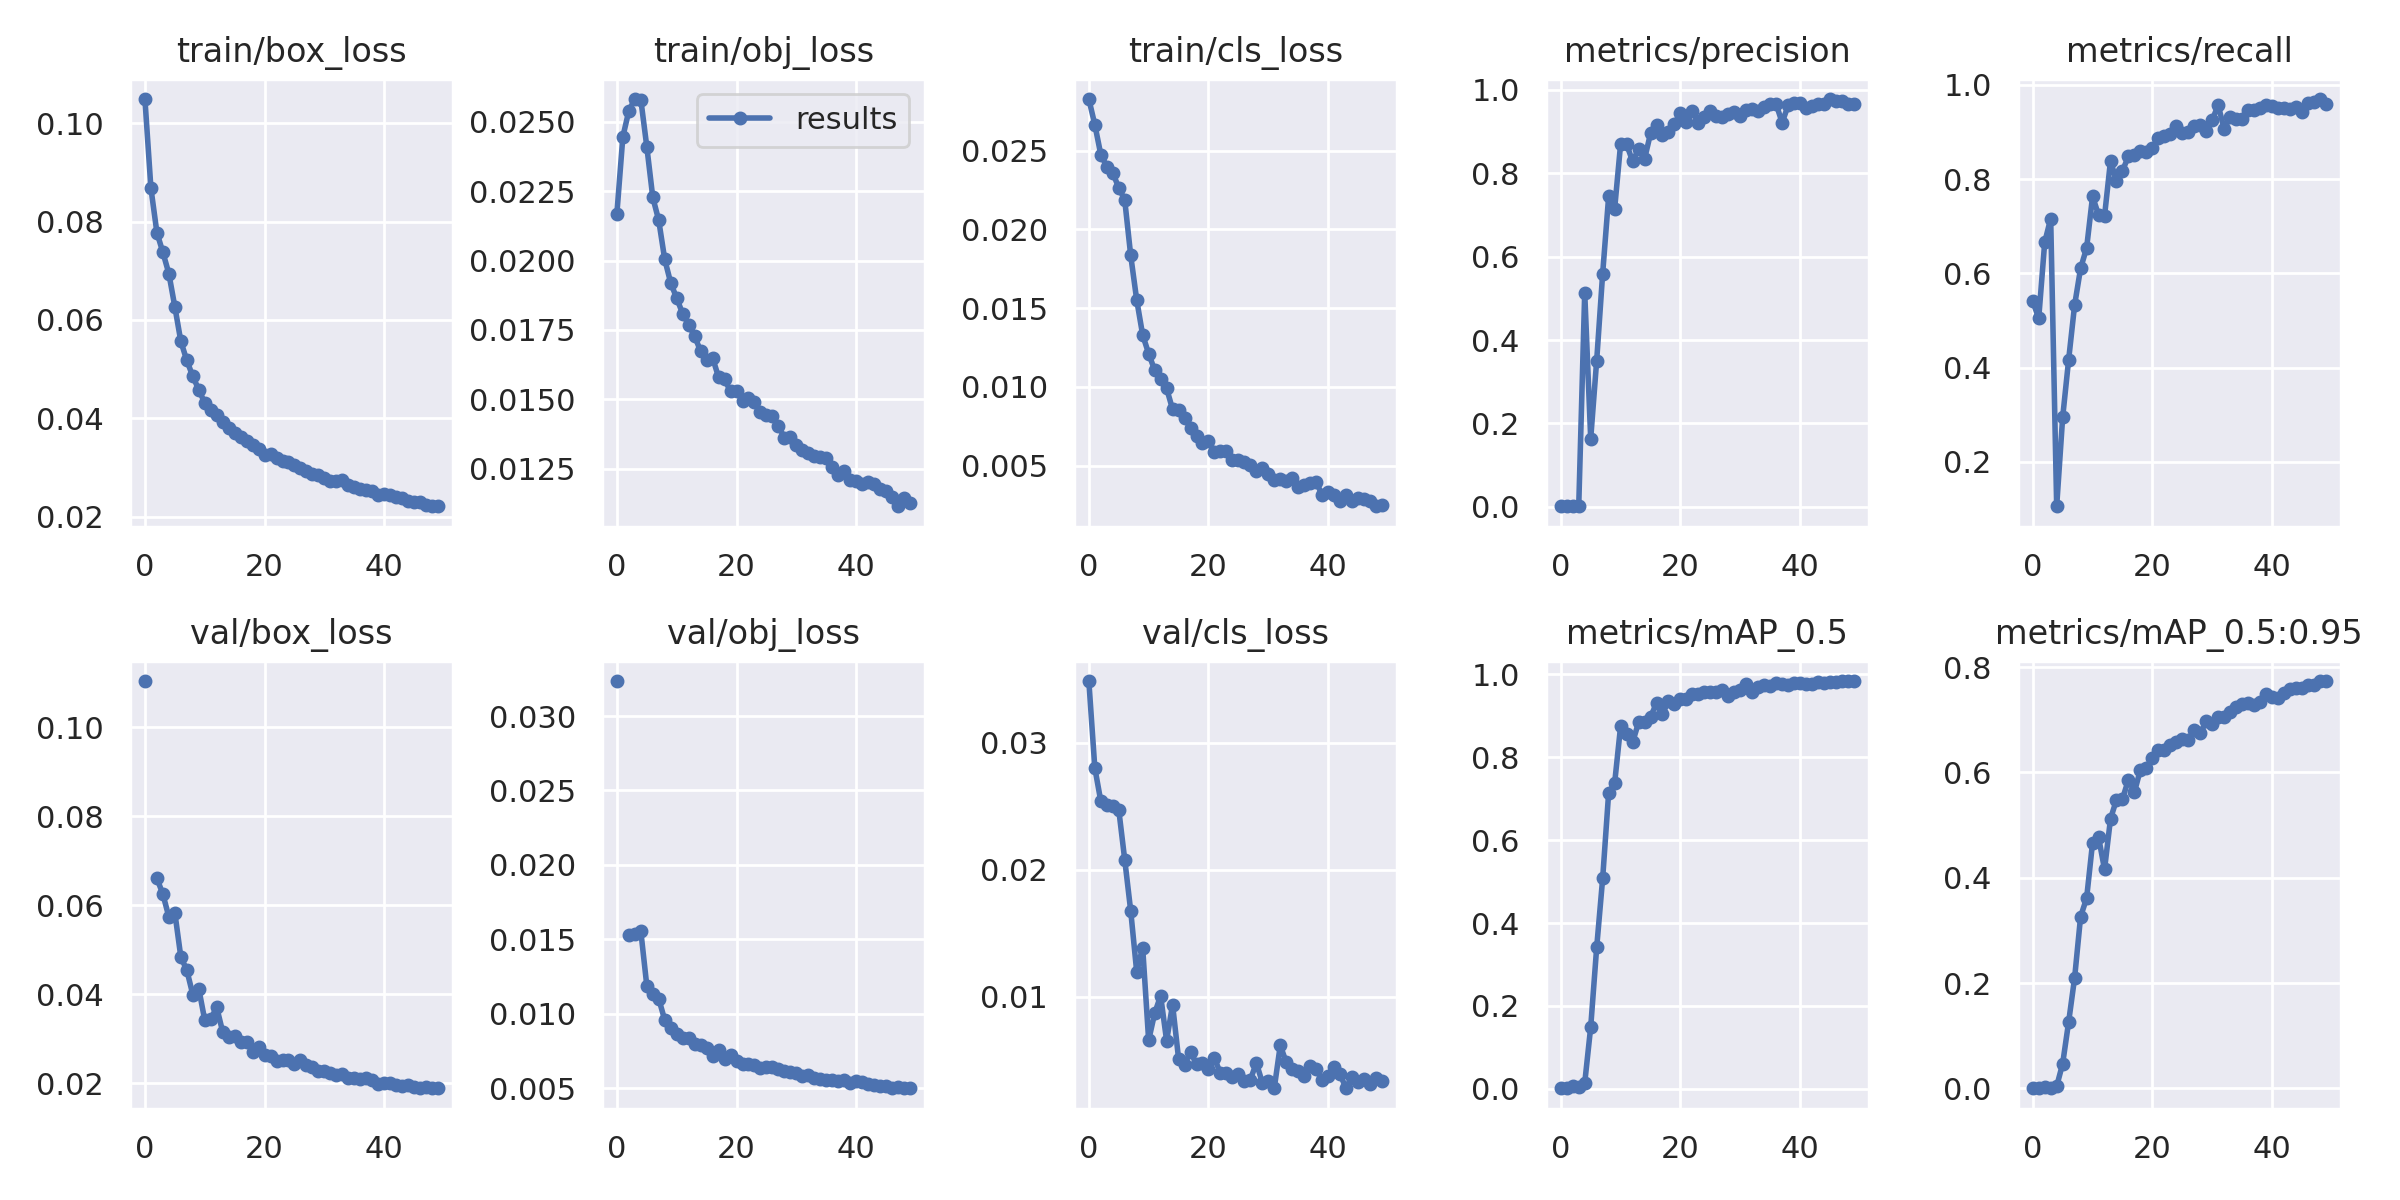

In [45]:
from IPython.display import Image, clear_output  # to display images
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5l_results2/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


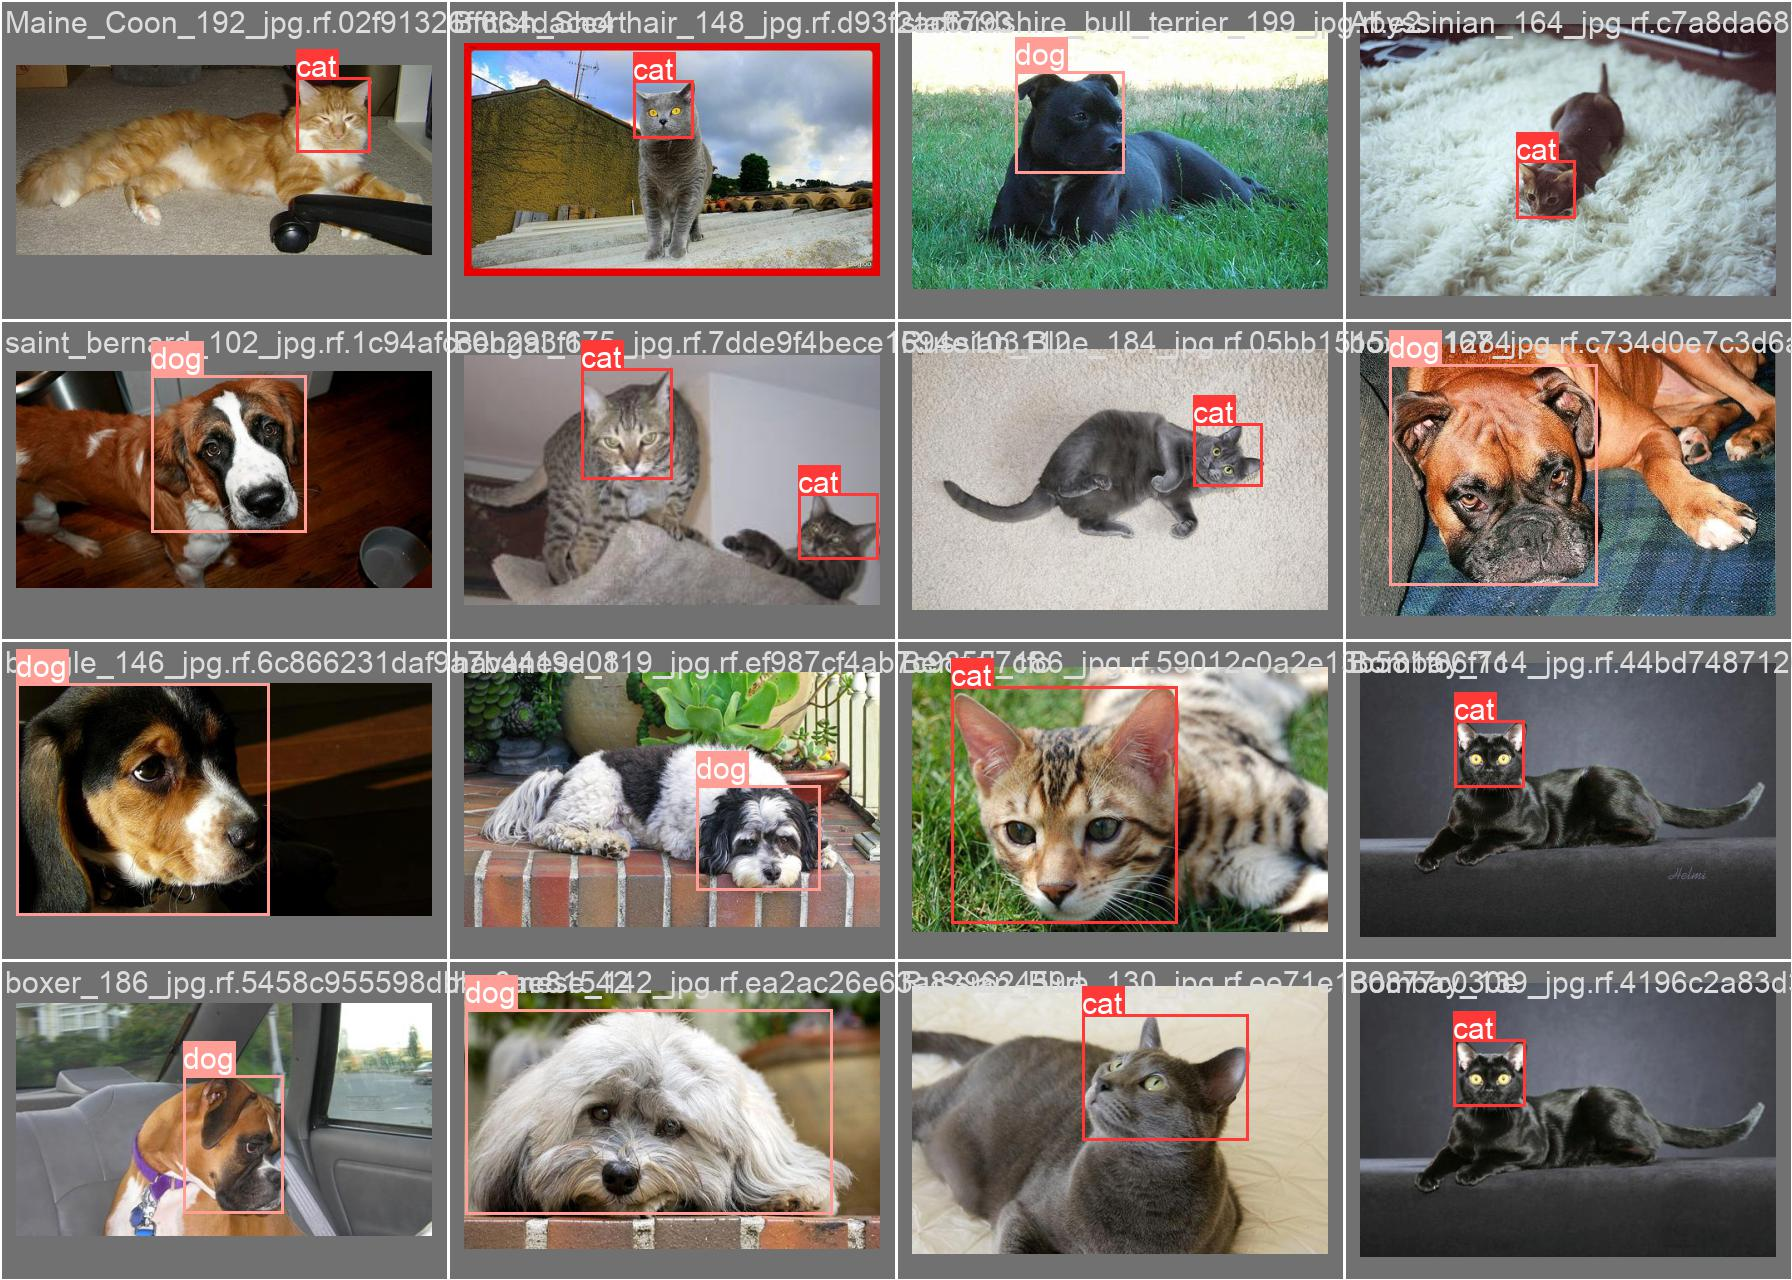

In [48]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5l_results2/val_batch0_labels.jpg', width=900)

PREDICTION TRUTH TRAINING DATA:


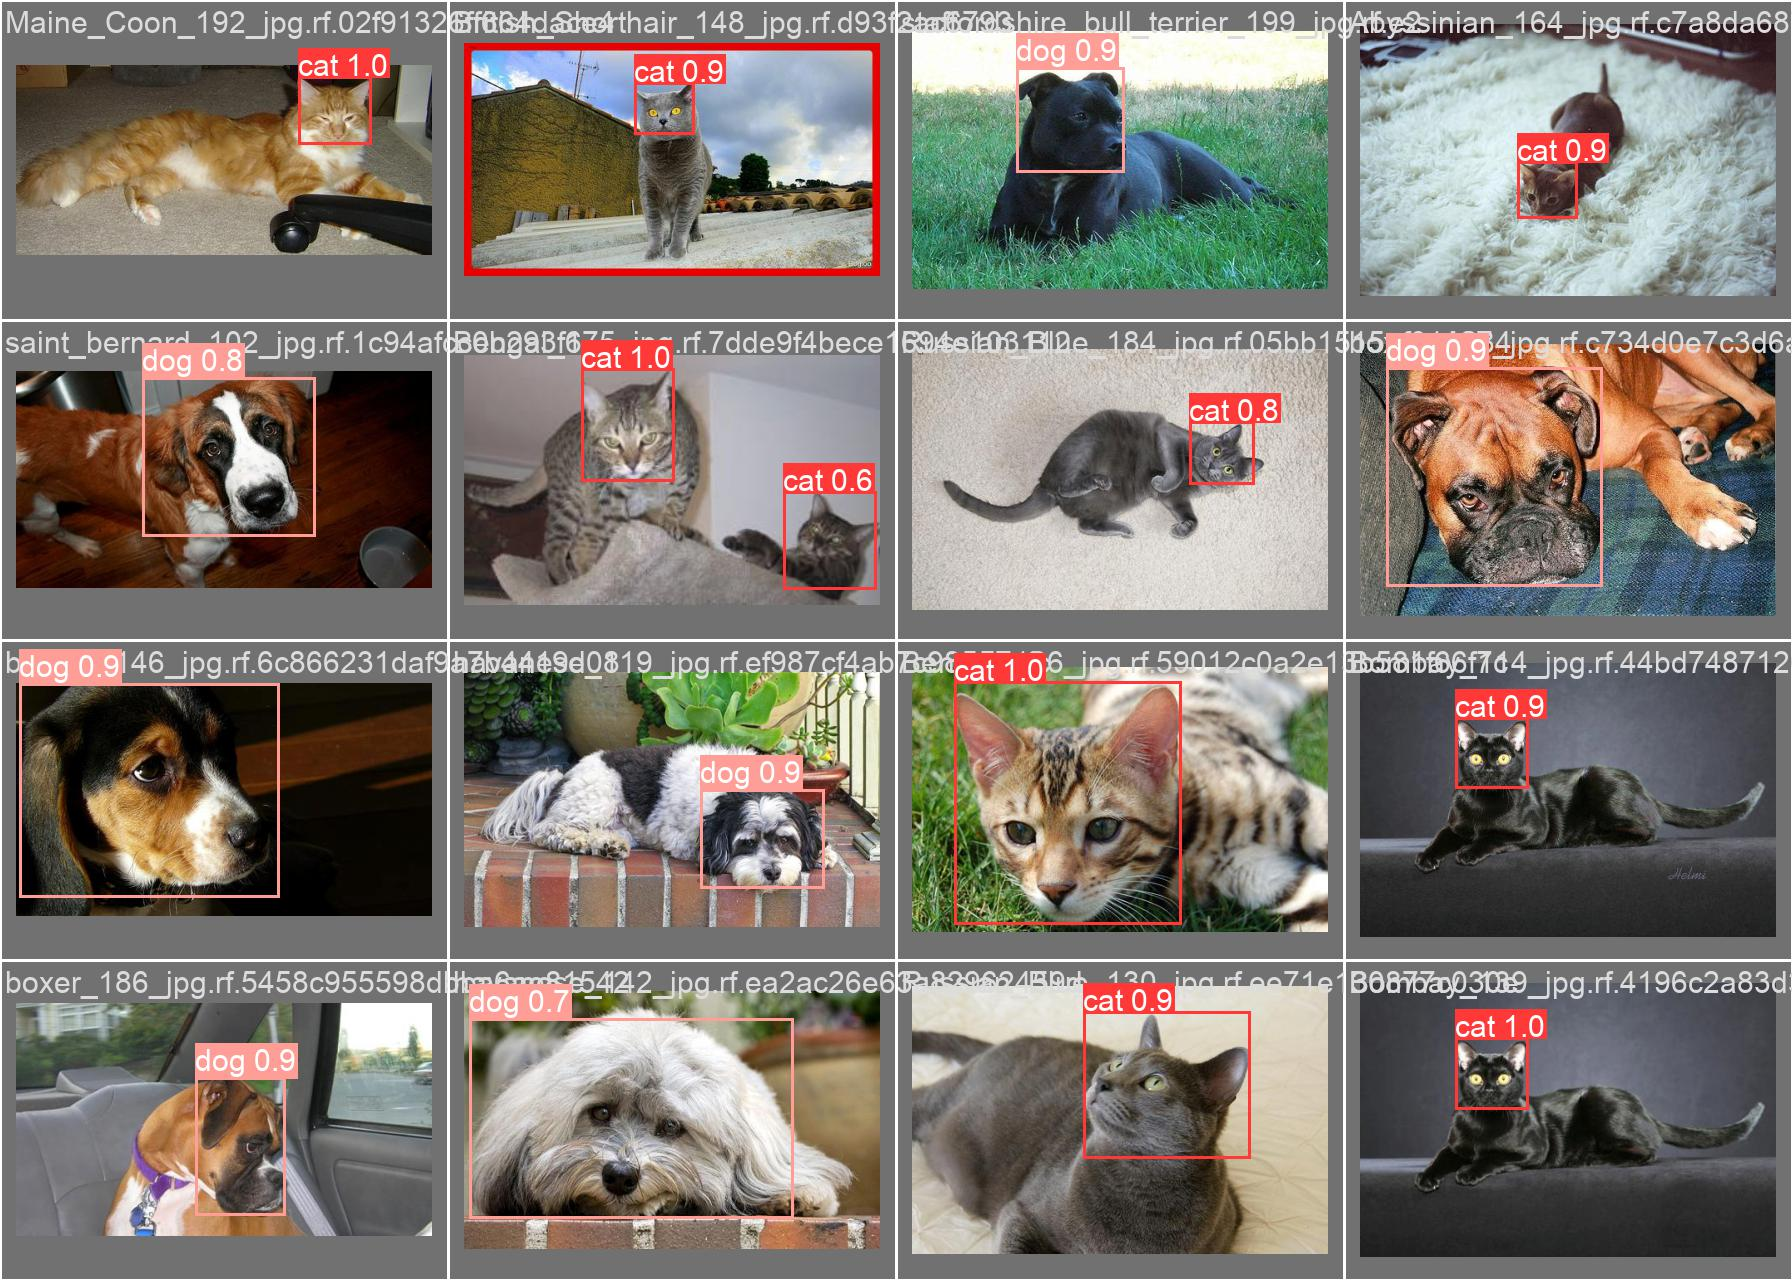

In [50]:
print("PREDICTION TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5l_results2/val_batch0_pred.jpg', width=900)

## Evaluation Metrics 

Confusion Matrix:


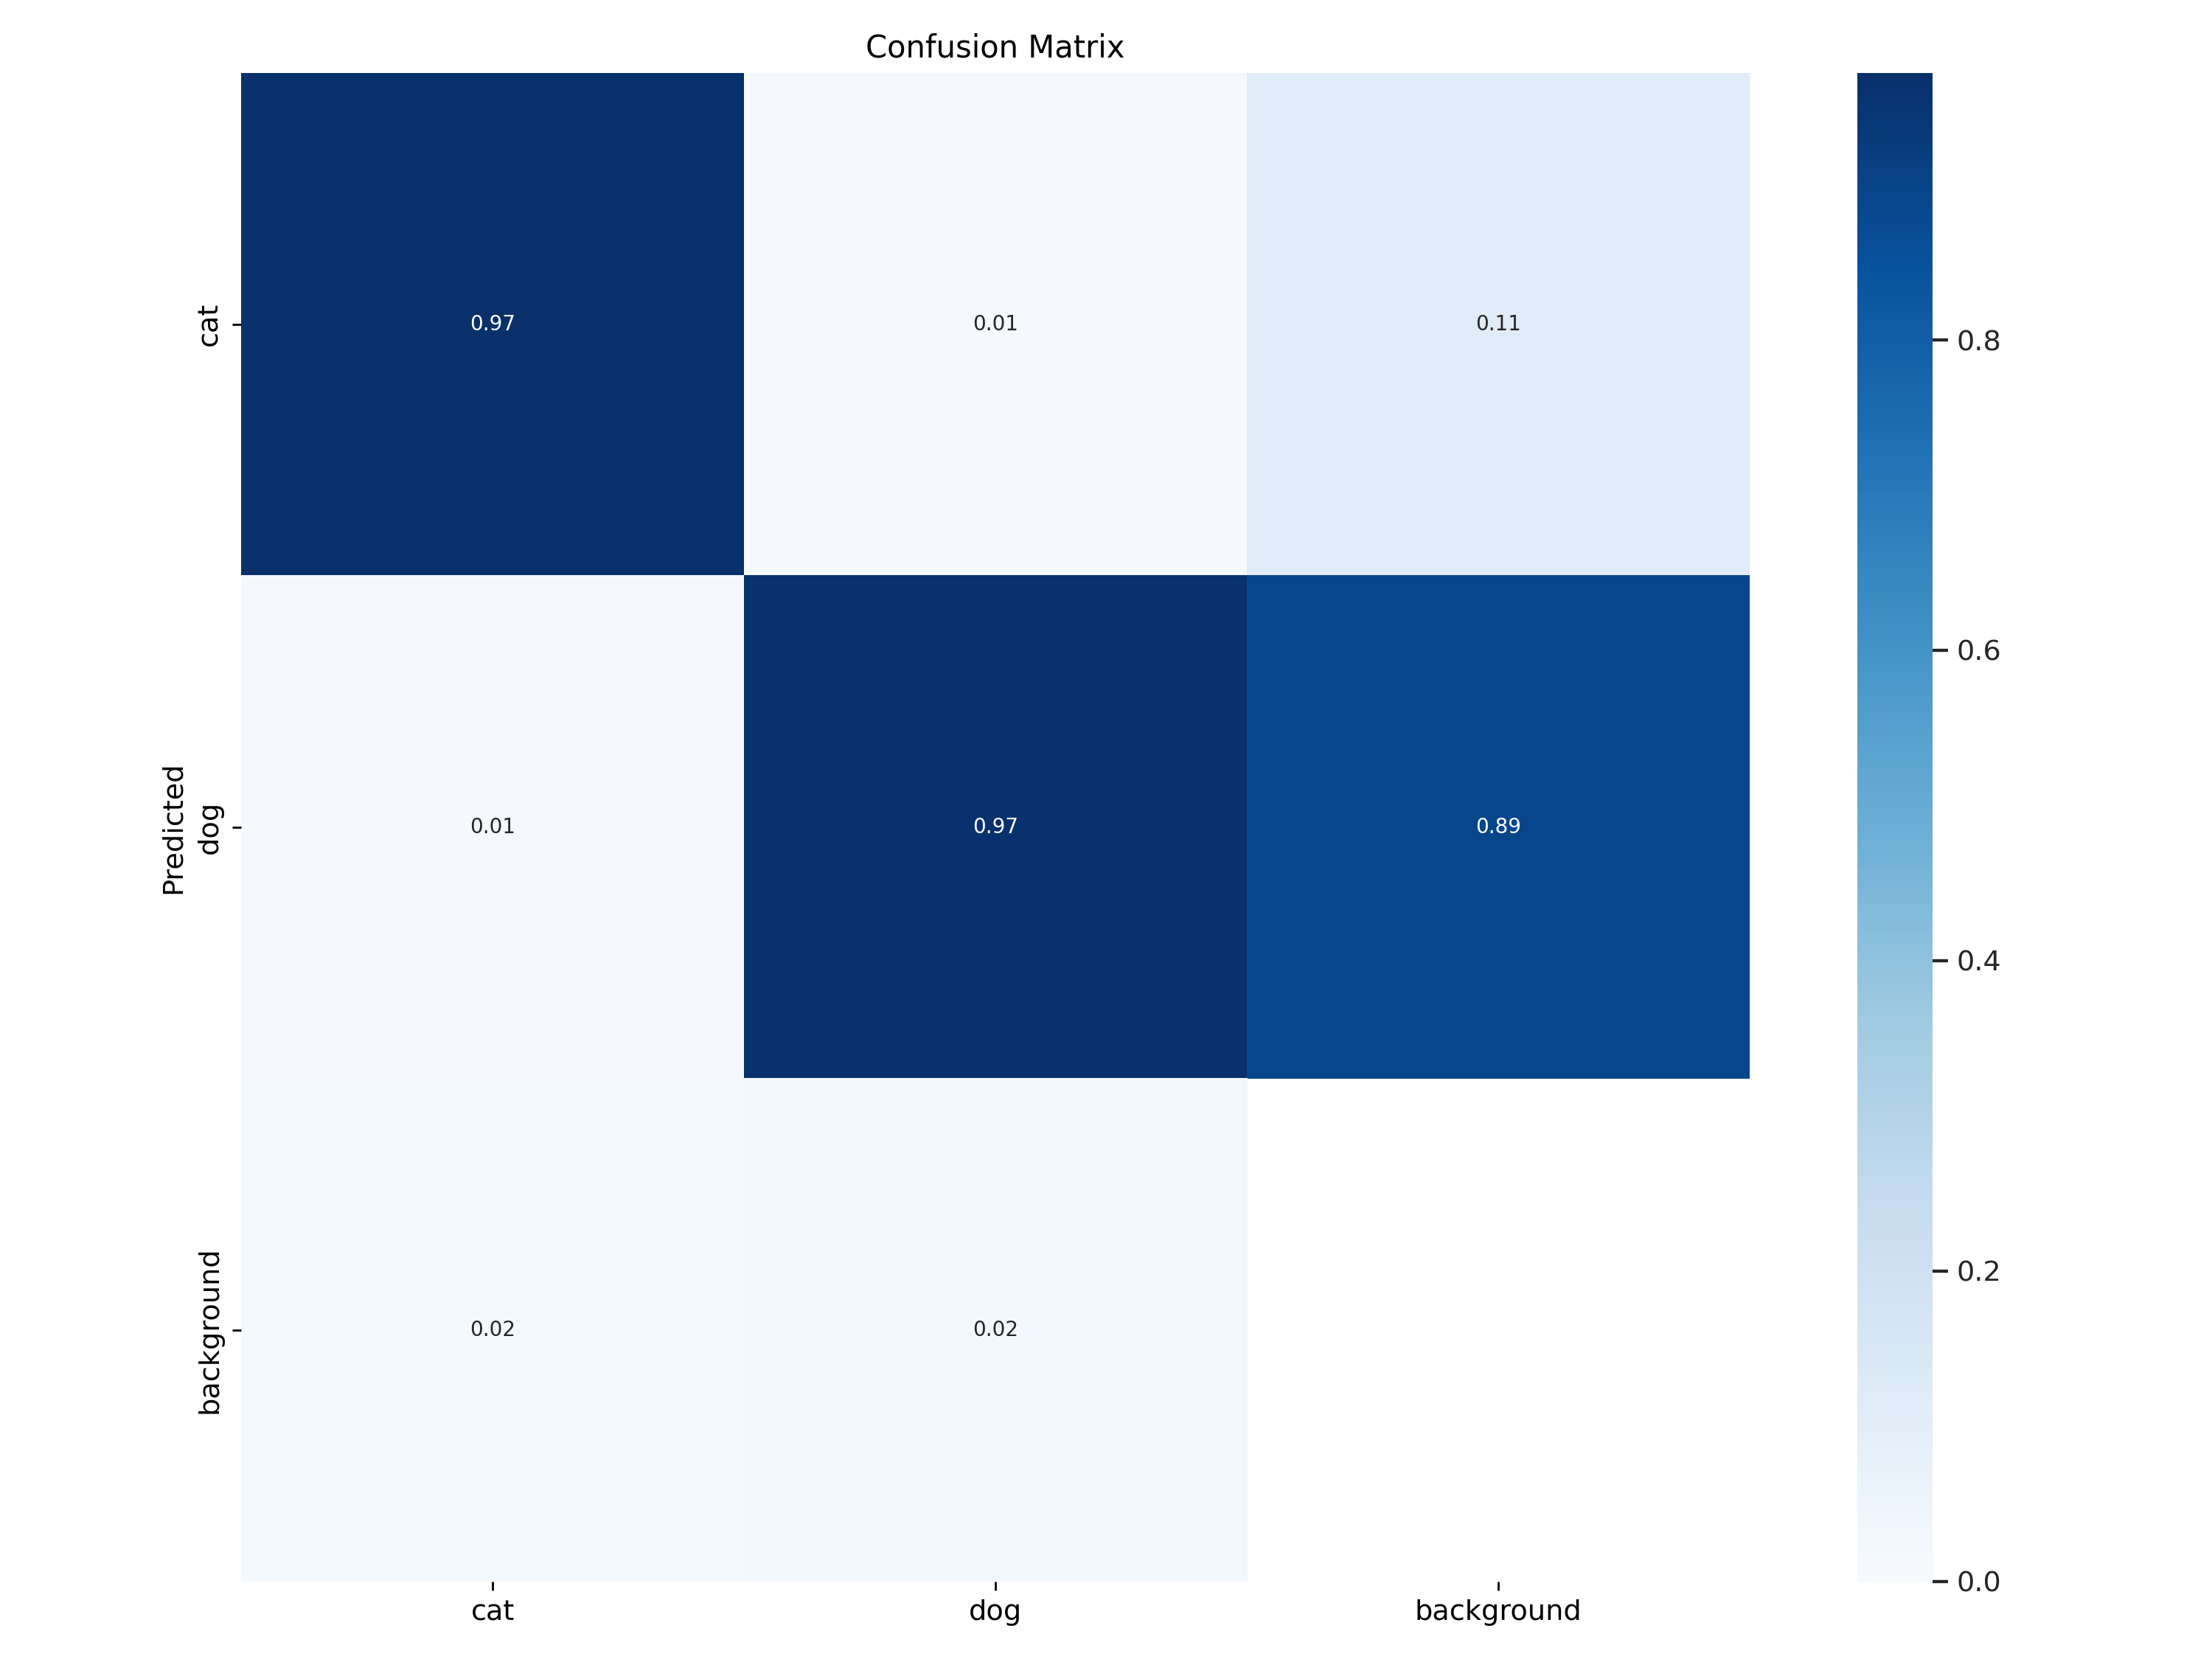

In [56]:
print("Confusion Matrix:")
Image(filename='/content/yolov5/runs/train/yolov5l_results2/confusion_matrix.png')

## Saving 

In [61]:
!mv /content/yolov5  /content/drive/MyDrive/Cats-vs-Dog

## Testing on Video